# Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n$th degree polynomial. It extends simple linear regression by allowing the model to fit a curve to the data, making it suitable for data where the relationship between variables is nonlinear.

The form of the polynomial equation is:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon
$$

Where:
- $y$ is the dependent variable (what you are trying to predict).
- $x$ is the independent variable (the input variable).
- $\beta_0, \beta_1, \ldots, \beta_n$ are the coefficients of the polynomial (these are the parameters to be estimated).
- $\epsilon$ is the error term (the difference between the observed value and the predicted value).
  
## Goal of Polynomial Regression

The goal is to find the values of $\beta_0, $\beta_1, \ldots, \beta_n$ that minimize the sum of the squared errors (SSE) between the predicted and actual values, just like in simple linear regression:

$$
\text{SSE} = \sum (y_i - \hat{y_i})^2
$$

Where:
- $y_i$ is the actual value of the dependent variable.
- $\hat{y_i}$ is the predicted value from the polynomial equation.

## Assumptions of Polynomial Regression

The assumptions are similar to those in simple linear regression:

1. **Linearity**: The relationship between the transformed independent variables ($x, x^2, x^3, \ldots$) and the dependent variable is linear.
2. **Independence**: The residuals (errors) are independent of each other.
3. **Homoscedasticity**: The variance of residuals is constant across all levels of the independent variable.
4. **Normality of residuals**: The residuals are normally distributed.

## Example

Let’s consider an example where we want to predict the price of a house based on its size, but the relationship between size and price is nonlinear.

- $y$ = Price of the house
- $x$ = Size of the house (in square feet)

A polynomial regression model (degree 2) might estimate the relationship like:

$$
\text{Price} = 50,000 + 100 \times (\text{Size in sq. ft.}) - 0.01 \times (\text{Size in sq. ft.})^2
$$

In this example:
- The intercept $\beta_0$ is 50,000, meaning that even if the house is 0 sq. ft., the predicted price starts at 50,000.
- The first-degree coefficient $\beta_1$ is 100, meaning that for each additional square foot, the price increases by $100.
- The second-degree coefficient $\beta_2$ is -0.01, meaning that as the size increases, the price increase slows down (due to the negative sign on the quadratic term).

This curve allows for more flexibility in modeling the relationship between house size and price.

## Data Transformation for Polynomial Regression

Before fitting a polynomial regression model, the data needs to be transformed to create additional features representing the polynomial terms. For instance, for a second-degree polynomial, you need to create squared terms ($x^2$) for each feature.

The transformation is done using a tool like **PolynomialFeatures** from libraries such as `sklearn`. Here's how the transformation is performed:

### Step-by-Step Data Transformation:
1. **Start with the original feature $x$** (for example, the size of a house in square feet).
   
2. **Transform the original feature**: 
   - If you are performing second-degree polynomial regression, the transformed features will include:
     - The original feature $x$ (e.g., size),
     - The squared feature $x^2$ (e.g., size squared).
   
3. **Fit the model with the transformed data**: Once the original features are expanded to include polynomial terms, the linear regression model is then fitted to these new features.



## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error


In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Polynomial Regression (degree 2) with bedrooms as independent variable:
Coefficient: [     0.         153685.23402088  -3833.71437254]
Intercept: 66952.24014613556
MAE: 227036.77973526914 MSE: 136920848673.01169 RMSE: 370028.1728098709 R^2 0.09429933599576823
Conclusion: bedrooms has a weak relationship with price (R-squared = 0.09).
--------------------------------------------------


d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


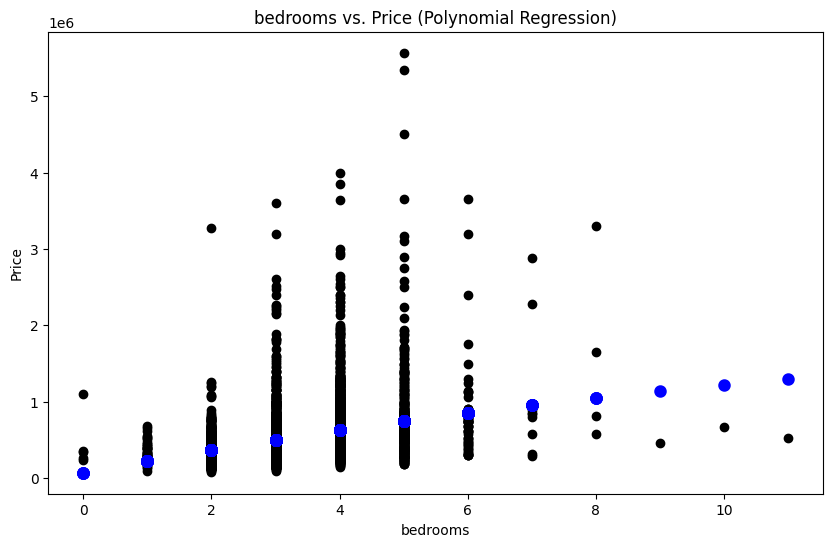

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with bathrooms as independent variable:
Coefficient: [      0.         -206390.48959438   99185.24361251]
Intercept: 472548.66164130485
MAE: 203275.66926177833 MSE: 107678171138.60724 RMSE: 328143.52216462727 R^2 0.2877330805047752
Conclusion: bathrooms has a weak relationship with price (R-squared = 0.29).
--------------------------------------------------


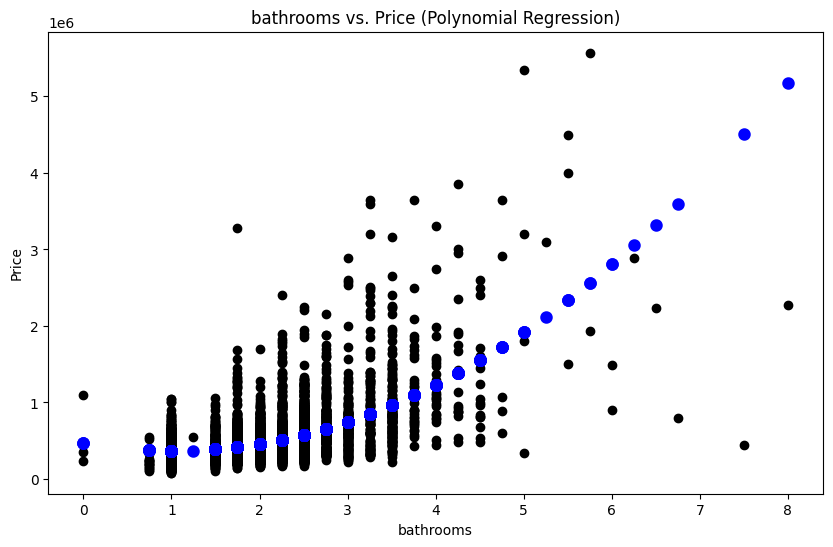

Polynomial Regression (degree 2) with sqft_living as independent variable:
Coefficient: [0.         6.56456192 0.05063315]
Intercept: 264700.3569101233
MAE: 171786.30972476857 MSE: 82113931183.64449 RMSE: 286555.2846897863 R^2 0.45683478653690435
Conclusion: sqft_living has a moderate relationship with price (R-squared = 0.46).
--------------------------------------------------


d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


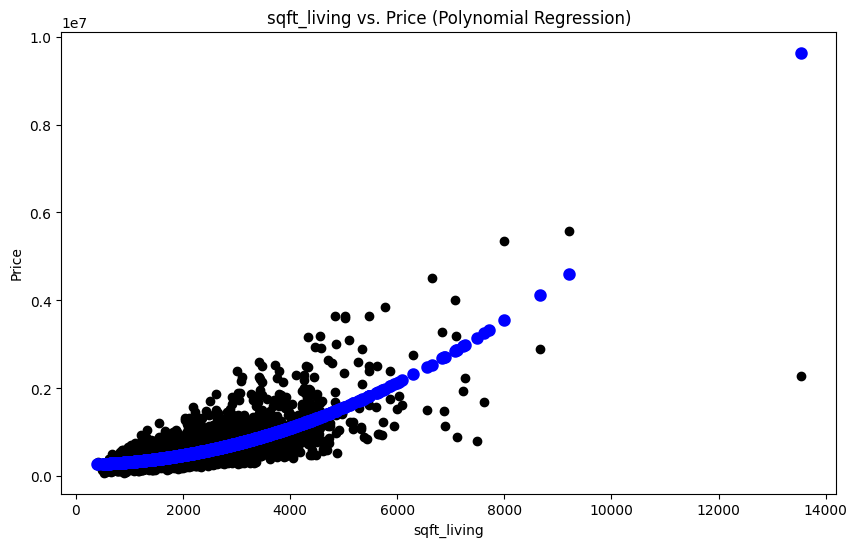

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with sqft_lot as independent variable:
Coefficient: [ 0.00000000e+00  1.59137430e+00 -1.55133567e-06]
Intercept: 516897.17436843377
MAE: 238717.80563092334 MSE: 150022090706.31534 RMSE: 387326.8525500334 R^2 0.007637562249531382
Conclusion: sqft_lot has a weak relationship with price (R-squared = 0.01).
--------------------------------------------------


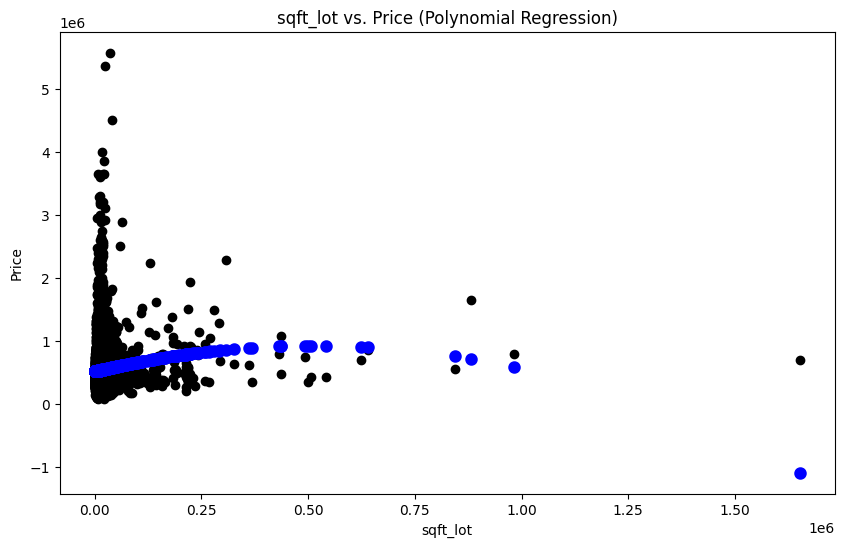

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with floors as independent variable:
Coefficient: [      0.          567411.81720339 -119634.9620685 ]
Intercept: -8747.429860217031
MAE: 225451.46225758028 MSE: 140038769410.22046 RMSE: 374217.5428947986 R^2 0.07367499054822824
Conclusion: floors has a weak relationship with price (R-squared = 0.07).
--------------------------------------------------


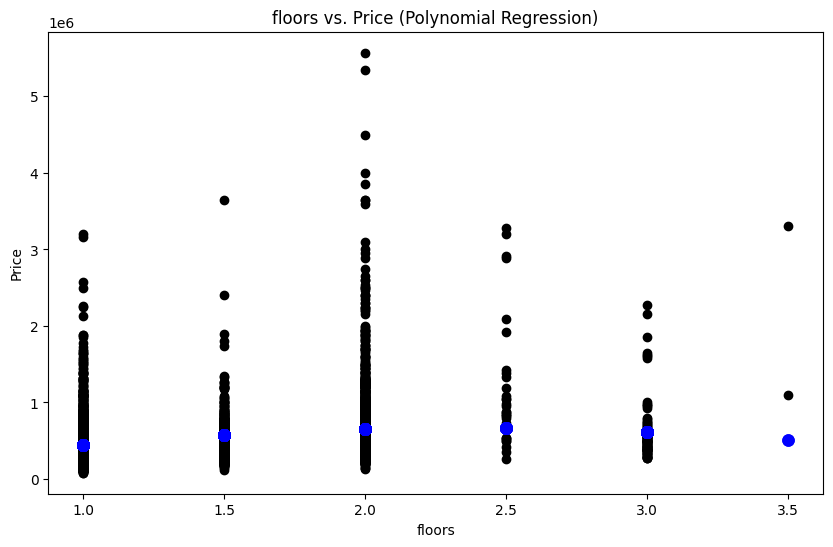

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with waterfront as independent variable:
Coefficient: [ 0.0000000e+00  3.4864331e+17 -3.4864331e+17]
Intercept: 530173.54794679
MAE: 234277.13728770227 MSE: 137099718804.32616 RMSE: 370269.79191439063 R^2 0.09311615024814746
Conclusion: waterfront has a weak relationship with price (R-squared = 0.09).
--------------------------------------------------


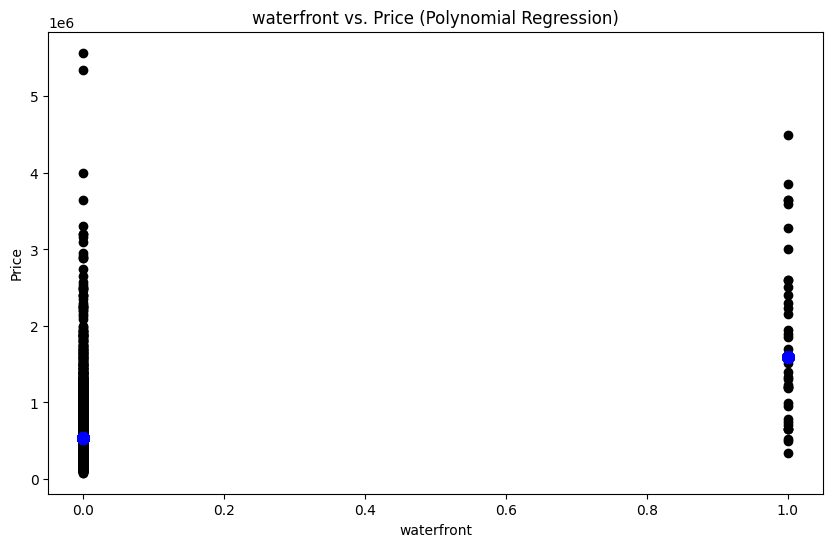

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with view as independent variable:
Coefficient: [     0.         108395.54497126  25401.08413832]
Intercept: 496391.4750855567
MAE: 223006.70715717576 MSE: 124046956179.87756 RMSE: 352203.00421756424 R^2 0.17945724359241422
Conclusion: view has a weak relationship with price (R-squared = 0.18).
--------------------------------------------------


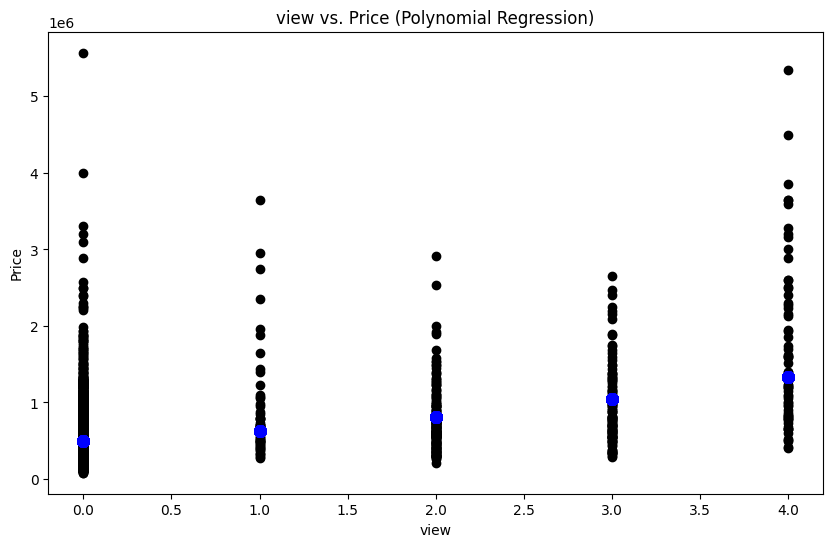

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with condition as independent variable:
Coefficient: [     0.         -10018.87440675   4031.53158344]
Intercept: 523383.5528737433
MAE: 239491.2807136117 MSE: 151067501907.15112 RMSE: 388674.0303997054 R^2 0.0007224019366152135
Conclusion: condition has a weak relationship with price (R-squared = 0.00).
--------------------------------------------------


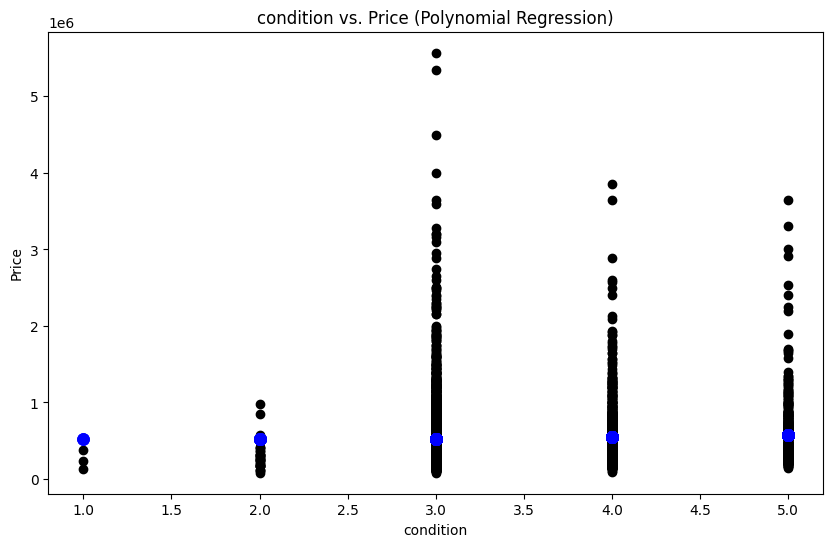

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with grade as independent variable:
Coefficient: [      0.         -448957.16163448   40406.00004457]
Intercept: 1551636.493331351
MAE: 167134.5425215341 MSE: 71105991880.17113 RMSE: 266657.0679358999 R^2 0.5296498328435758
Conclusion: grade has a moderate relationship with price (R-squared = 0.53).
--------------------------------------------------


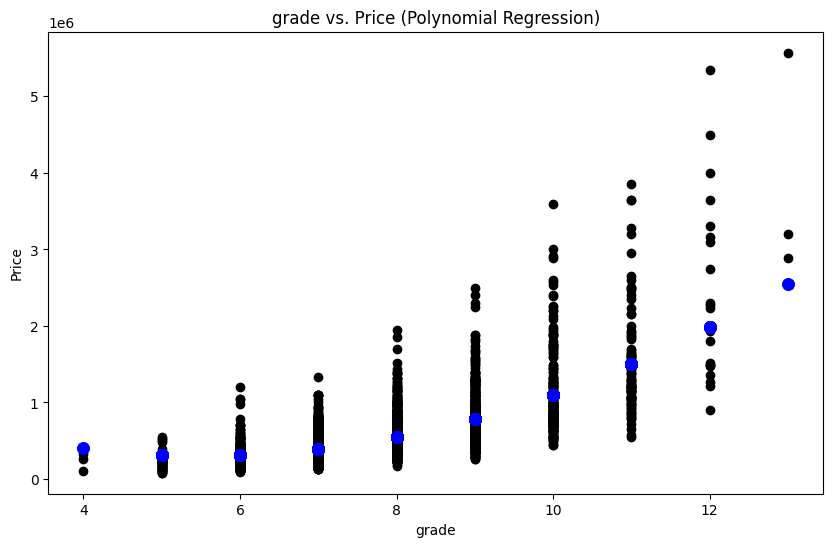

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with sqft_above as independent variable:
Coefficient: [ 0.         -1.99214264  0.05635362]
Intercept: 323536.57654422964
MAE: 190277.25226009655 MSE: 90070700977.668 RMSE: 300117.81183006783 R^2 0.4042025412972766
Conclusion: sqft_above has a moderate relationship with price (R-squared = 0.40).
--------------------------------------------------


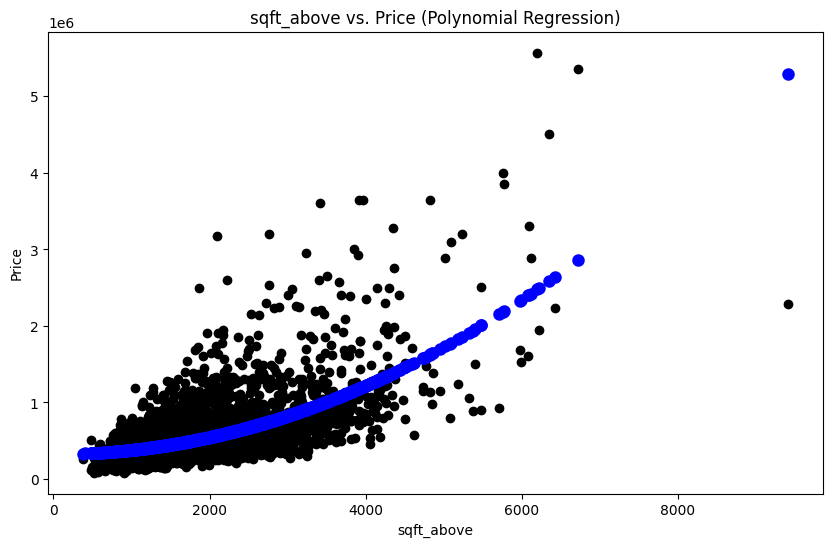

d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Polynomial Regression (degree 2) with sqft_basement as independent variable:
Coefficient: [  0.        -70.8138566   0.2653201]
Intercept: 485094.99333971646
MAE: 226459.96328563892 MSE: 128526488518.26477 RMSE: 358505.9114132775 R^2 0.1498261431966319
Conclusion: sqft_basement has a weak relationship with price (R-squared = 0.15).
--------------------------------------------------


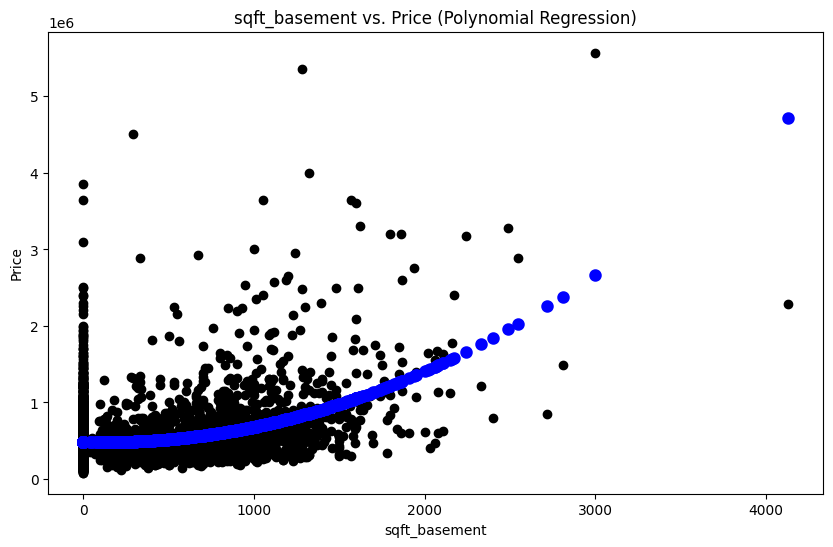

In [11]:
# List of independent variables (features) to try
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']

# Target variable
y = df['price']

for feature in features:
    X = df[[feature]]  # Independent variable (feature)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create polynomial features (degree 2 for simplicity)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Create and fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict the values using the model
    y_pred = model.predict(X_test_poly)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # Output the results
    print(f"Polynomial Regression (degree 2) with {feature} as independent variable:")
    print(f"Coefficient: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))
    
    # Interpretation of results
    if r2 > 0.7:
        print(f"Conclusion: {feature} has a strong relationship with price (R-squared = {r2:.2f}).")
    elif 0.3 <= r2 <= 0.7:
        print(f"Conclusion: {feature} has a moderate relationship with price (R-squared = {r2:.2f}).")
    else:
        print(f"Conclusion: {feature} has a weak relationship with price (R-squared = {r2:.2f}).")
    
    print("-" * 50)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='black')
    plt.scatter(X_test, y_pred, color='blue', linewidth=3)
    plt.title(f'{feature} vs. Price (Polynomial Regression)')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()
